<a href="https://colab.research.google.com/github/dmswneunju/DeepLearning_signiture/blob/main/ch04_%EA%B5%B0%EC%A7%91%EB%AA%A8%EB%8D%B8%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집모델

## 문제정의
- data : 캐글의 customer-segmentation-tutorial(쇼핑몰 고객 세분화 데이터, 장바구니 분석)
- vip, vvip 등 군집화해서 그룹을 만들고싶다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./drive/MyDrive/DeepLearning_signiture/data/exercise3.csv')
df.head()
#각각의 column들이 spending score에 얼마나 영향을 미치는지 확인

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
pwd

'/content'

In [ ]:
df.shape

(200, 5)

## 데이터 탐색

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Gender', ylabel='count'>

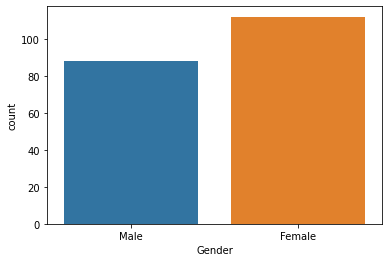

In [ ]:
sns.countplot(x=df['Gender'])

In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

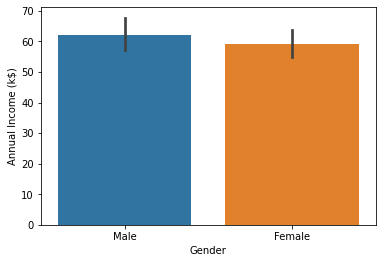

In [ ]:
# 성별에 따라 연소득이 얼마나 차이나는지
sns.barplot(x='Gender', y='Annual Income (k$)', data=df)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

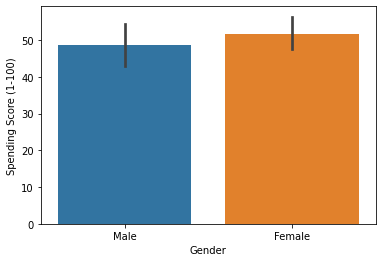

In [ ]:
# 성별에 따라 소비 점수가 얼마나 차이나는지
sns.barplot(x='Gender', y='Spending Score (1-100)', data=df)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

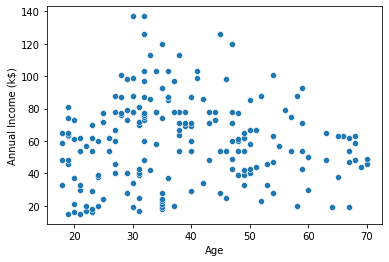

In [ ]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

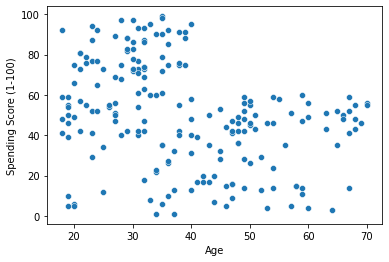

In [ ]:
# 성별에 따라 소비 점수가 얼마나 차이나는지
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
# 연령이 낮은 층에서 소비점수가 높음을 알 수 있다.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

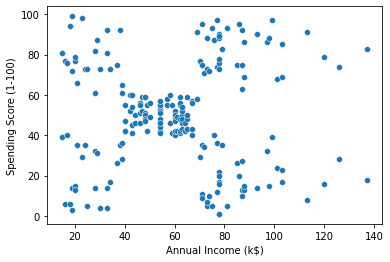

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
# 데이터를 분석하여 군집을 만들고 싶었지만, Age, Annual Income (k$), Spending Score (1-100)중 하나의 feature를 가지고 기준점 사용하기에 애매함.
# 각각의 특성들을 통합적으로 사용하여 cluster를 만들자.

## 주요코드 미리보기

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# 평균 0, 분산 1로 정규화
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# 만들어진 클러스터들이 얼마나 응집도를 가지고 있는지 확인
from sklearn.metrics import silhouette_samples, silhouette_score

#Annual Income과 Spending Score를 가지고 cluster 만들고자한다.
X = df.iloc[:, 3:]
sc = StandardScaler()
X = sc.fit_transform(X)

model = KMeans(n_clusters=2, random_state=42)
y_preds = model.fit_predict(X) #KMeans는 지도학습기반 알고리즘이 아니므로 fit할 때 x,y를 함께 넣어주지 않는다.
df['cluster'] = y_preds

print('실루엣 점수: {0: .4f}'.format(silhouette_score(X, y_preds)))
# 1의 점수에 가까울수록 더 좋은 성능을 가진 클러스터

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


실루엣 점수:  0.3147


In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

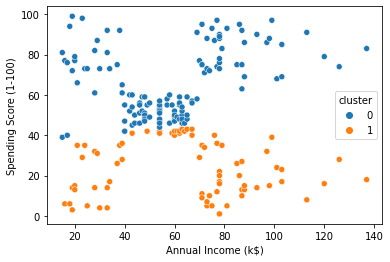

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = 'cluster') #hue에 따라 색을 다르게
# spending score가 낮으면 1번 그룹, spending score가 높으면 0번 그룹
# 실루엣 점수가 0.3147로 높지 않았음. => 설정한 k값이 적합하지 않았던것임.

## 코드 구현
- 적절한 k값을 찾아보기 위해 k값을 변화시키면서 다양한 모델(kmeans) 생성
- k값을 변화시켰을때 실루엣 점수가 어떻게 변하는지 확인

In [ ]:
silhouette_avg = []
for k in range(10):
  model = KMeans(n_clusters=k+2, random_state=42) #최소 2개의 클러스터부터 
  y_preds = model.fit_predict(X)
  score = silhouette_score(X, y_preds)
  silhouette_avg.append(score)
  print('군집갯수: {0}개, 평균 실루엣점수: {1:.4f}'.format(k+2, score))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집갯수: 2개, 평균 실루엣점수: 0.3147
군집갯수: 3개, 평균 실루엣점수: 0.4666
군집갯수: 4개, 평균 실루엣점수: 0.4939


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집갯수: 5개, 평균 실루엣점수: 0.5547
군집갯수: 6개, 평균 실루엣점수: 0.5399


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집갯수: 7개, 평균 실루엣점수: 0.5263
군집갯수: 8개, 평균 실루엣점수: 0.4558


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집갯수: 9개, 평균 실루엣점수: 0.4553


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집갯수: 10개, 평균 실루엣점수: 0.4476


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집갯수: 11개, 평균 실루엣점수: 0.4385


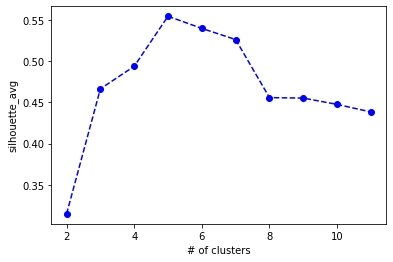

In [ ]:
plt.plot(range(2,12), silhouette_avg, 'bo--') # 2~11
plt.xlabel('# of clusters')
plt.ylabel('silhouette_avg')
plt.show()
# 5일때가 가장 높은 점수. k=5일때 실루엣 점수가 가장 높다.

In [ ]:
model = KMeans(n_clusters=5, random_state=42)
y_preds = model.fit_predict(X)
df['cluster'] = y_preds

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

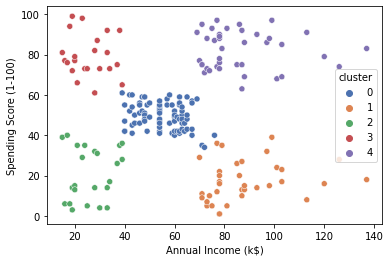

In [ ]:
sns.scatterplot(x = 'Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='cluster', palette='deep')

<Axes: xlabel='cluster', ylabel='Spending Score (1-100)'>

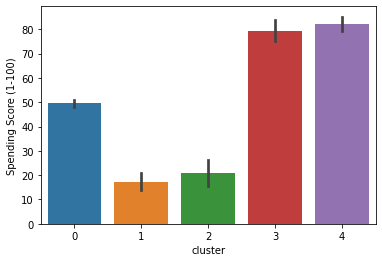

In [ ]:
sns.barplot(x='cluster', y='Spending Score (1-100)', data=df)

<Axes: xlabel='cluster', ylabel='Annual Income (k$)'>

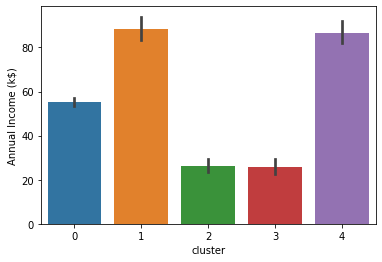

In [ ]:
sns.barplot(x='cluster', y='Annual Income (k$)', data=df)

<Axes: xlabel='cluster', ylabel='count'>

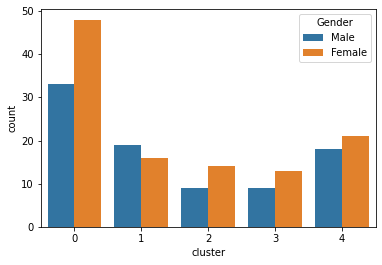

In [ ]:
sns.countplot(x='cluster', data=df, hue='Gender')

<Axes: xlabel='cluster', ylabel='Age'>

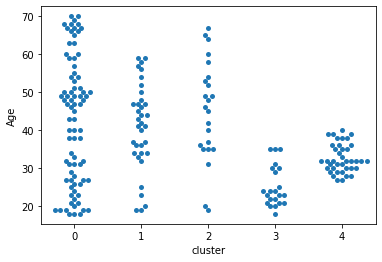

In [ ]:
sns.swarmplot(x='cluster', y='Age', data=df)